In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [27]:
%env KERAS_BACKEND=tensorflow
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Activation,Dropout,Flatten
from keras.models import Model, Sequential

env: KERAS_BACKEND=tensorflow


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_train = x_train/255
x_test = x_test/255

### 建構模型

In [5]:
my_model = Sequential()

## filter設5 , batch_size設150

In [7]:
batch_size = 150     
filters1 = 5         
filters2 = filters1*2 
Flat_Dense = 9       
SGDlr = 0.07         
kernelsize = (5, 5) 

### convolution 1

In [11]:
my_model.add(Conv2D(filters1, kernelsize, padding='same', input_shape=(28,28,1)))
my_model.add(Activation('relu'))
my_model.add(MaxPool2D(pool_size=(2,2))) # Max-Pooling!

### convolution 2

In [12]:
my_model.add(Conv2D(filters2, kernelsize, padding='same'))
my_model.add(Activation('relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))

### convolution 3

In [15]:
my_model.add(Conv2D(filters2*2, kernelsize, padding='same'))
my_model.add(Activation('relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))

In [16]:
my_model.add(Flatten())
my_model.add(Dense(Flat_Dense))
my_model.add(Activation('relu'))
my_model.add(Dense(10))
my_model.add(Activation('softmax'))

Learning rate 一如往常的 0.87

In [22]:
my_model.compile(loss='mse', optimizer=SGD(lr=0.87),metrics=['accuracy'])

### 檢查層數

In [23]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         130       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 5)         630       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 10)        1260      
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 10)        0         
__________

## 漫長的等待

In [24]:
my_model_conv = my_model.fit(x_train,y_train,batch_size=150, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0621 - acc: 0.4601
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0153 - acc: 0.8963
Epoch 3/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0078 - acc: 0.9499
Epoch 4/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0059 - acc: 0.9620
Epoch 5/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0049 - acc: 0.9690
Epoch 6/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0041 - acc: 0.9739
Epoch 7/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0037 - acc: 0.9764
Epoch 8/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0033 - acc: 0.9791
Epoch 9/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0030 - acc: 0.9809
Epoch 10/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0028 - acc: 0.98

In [34]:
import numpy as np
predict = my_model.predict_classes(x_test)

## 看到有別的同學這樣展示結果覺得很好看，學著用，每次隨機挑15個顯示：

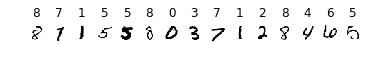

In [40]:
pick = np.random.randint(1,9999, 15)
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")

In [42]:
score1 = my_model.evaluate(x_test, y_test)
print(f'測試資料的 loss: {score1[0]:.5f}')
print(f'測試資料的正確率: {score1[1]}')

10000/10000 [==============================] - 9s 897us/step
測試資料的 loss: 0.00300
測試資料的正確率: 0.9806


## 訓練資料準確率 98.19 % , 測試資料確率 98.06 %